In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
import catboost as cb
from sklearn.metrics import mean_squared_error
train=pd.read_csv("C:\\Users\\Achraf\\Desktop\\gmc\\.ipynb_checkpoints\\prices\\train.csv")
test=pd.read_csv("C:\\Users\\Achraf\\Desktop\\gmc\\.ipynb_checkpoints\\prices\\test.csv")

In [2]:
null_train=train.isnull().sum().copy(deep=False)
null_test=test.isnull().sum().copy(deep=False)

In [3]:
null_test.loc[null_test > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [4]:
null_train.loc[null_train > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [7]:
test.MSZoning.fillna(value='RL',inplace=True)

In [8]:
train.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [9]:
train.LotFrontage.fillna(train.LotFrontage.mean(),inplace=True)
test.LotFrontage.fillna(train.LotFrontage.mean(),inplace=True)

In [10]:
train.isnull().sum().loc[train.isnull().sum() > 0]

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
test.isnull().sum().loc[test.isnull().sum() > 0]

Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [12]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
train.drop('Alley',axis=1,inplace=True)


In [14]:
test.drop('Alley',axis=1,inplace=True)

In [15]:
train.isnull().sum().loc[train.isnull().sum() > 0]


MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [16]:
test.isnull().sum().loc[test.isnull().sum() > 0]

Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [17]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
train.MasVnrType.fillna('None',inplace=True)

In [19]:
train.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [20]:
test.MasVnrType.fillna('None',inplace=True)
test.MasVnrArea.fillna(1.094907,inplace=True)

In [21]:
train.MasVnrArea.fillna(1.094907,inplace=True)

In [22]:
train.isnull().sum().loc[train.isnull().sum() > 0]


BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [23]:
test.isnull().sum().loc[test.isnull().sum() > 0]

Utilities          2
Exterior1st        1
Exterior2nd        1
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [24]:
train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [25]:
train.BsmtQual.fillna('Fa',inplace=True)
test.BsmtQual.fillna('Fa',inplace=True)

In [26]:
test.BsmtCond.value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [27]:
train.loc[train.BsmtQual =='Fa','BsmtCond'].iloc[:50]

17      NaN
39      NaN
74       TA
90      NaN
102     NaN
106      TA
156     NaN
181      TA
182     NaN
184      TA
187      TA
202      TA
246      TA
259     NaN
264      TA
342     NaN
362     NaN
371     NaN
375      Po
383      Fa
392     NaN
398      Po
436      TA
479      TA
494      TA
520     NaN
531      Fa
532     NaN
533     NaN
553     NaN
630      Fa
638      TA
646     NaN
662      Fa
669      TA
705     NaN
736     NaN
740      Fa
749     NaN
771      Fa
778     NaN
786      TA
821      TA
868     NaN
894     NaN
897     NaN
935      TA
984     NaN
1000    NaN
1001     TA
Name: BsmtCond, dtype: object

In [28]:
train.BsmtCond.fillna('Fa',inplace=True)
test.BsmtCond.fillna('Fa',inplace=True)

In [29]:
train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [30]:
train.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [31]:
train.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [32]:
test.Exterior2nd.fillna('VinylSd',inplace=True)
test.Exterior1st.fillna('VinylSd',inplace=True)
test.Utilities.fillna('AllPub',inplace=True)

In [33]:
train.isnull().sum().loc[train.isnull().sum() > 0]

BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [34]:
test.isnull().sum().loc[test.isnull().sum() > 0]

BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [35]:
train.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [36]:
train.BsmtUnfSF.value_counts()

0       118
728       9
384       8
572       7
600       7
       ... 
731       1
730       1
726       1
725       1
2046      1
Name: BsmtUnfSF, Length: 780, dtype: int64

In [37]:
train.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [38]:
train.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [39]:
train.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [40]:
train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [41]:
test.BsmtFinSF2.fillna(0,inplace=True)
test.BsmtUnfSF.fillna(0,inplace=True)
test.BsmtFullBath.fillna(0,inplace=True)
test.BsmtHalfBath.fillna(0,inplace=True)
test.KitchenQual.fillna('TA',inplace=True)
test.Functional.fillna('Typ',inplace=True)

In [42]:
train.isnull().sum().loc[train.isnull().sum() > 0]

BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [43]:
test.isnull().sum().loc[test.isnull().sum() > 0]

BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
TotalBsmtSF        1
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [44]:
from sklearn.impute import SimpleImputer
frequent_imputer= SimpleImputer(strategy="most_frequent")

In [45]:
train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [46]:
train.BsmtExposure.fillna('No',inplace=True)
test.BsmtExposure.fillna('No',inplace=True)

In [47]:
train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [48]:
train.BsmtFinType1.fillna('LwQ',inplace=True)
test.BsmtFinType1.fillna('LwQ',inplace=True)

In [49]:
train.BsmtFinSF1.value_counts() 

0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64

In [50]:
test.BsmtFinSF1.fillna(0,inplace=True)

In [51]:
train.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [52]:
test.BsmtFinType2.fillna('Rec',inplace=True)

In [53]:
train.BsmtFinType2.fillna('Rec',inplace=True)

In [54]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [55]:
train.Electrical.fillna('SBrkr',inplace=True)

In [56]:
train.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64

In [57]:
test.TotalBsmtSF.fillna(0,inplace=True)

In [58]:
train.isnull().sum().loc[train.isnull().sum() > 0]

FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [59]:
test.isnull().sum().loc[test.isnull().sum() > 0]

FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [60]:
train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [61]:
train.FireplaceQu.fillna('MISSING',inplace=True)
test.FireplaceQu.fillna('MISSING',inplace=True)

In [62]:
train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [63]:
train.GarageType.fillna('MISSING',inplace=True)
test.GarageType.fillna('MISSING',inplace=True)

In [64]:
train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [65]:
train.GarageFinish.fillna('MISSING',inplace=True)
test.GarageFinish.fillna('MISSING',inplace=True)

In [66]:
train.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [67]:
train.GarageFinish.fillna(0,inplace=True)
test.GarageFinish.fillna(0,inplace=True)

In [68]:
train.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [69]:
train.GarageQual.fillna('MISSING',inplace=True)
test.GarageQual.fillna('MISSING',inplace=True)

In [70]:
train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [71]:
train.GarageCond.fillna('MISSING',inplace=True)
test.GarageCond.fillna('MISSING',inplace=True)

In [72]:
train.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [73]:
train.PoolQC.fillna('MISSING',inplace=True)
test.PoolQC.fillna('MISSING',inplace=True)

In [74]:
train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [75]:
train.Fence.fillna('MISSING',inplace=True)
test.Fence.fillna('MISSING',inplace=True)

In [76]:
train.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [77]:
train.MiscFeature.fillna('MISSING',inplace=True)
test.MiscFeature.fillna('MISSING',inplace=True)

In [78]:
train.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [79]:
train.SaleType.fillna('New',inplace=True)
test.SaleType.fillna('New',inplace=True)

In [80]:
train.isnull().sum().loc[train.isnull().sum() > 0]

GarageYrBlt    81
dtype: int64

In [81]:
test.isnull().sum().loc[test.isnull().sum() > 0]

GarageYrBlt    78
GarageCars      1
GarageArea      1
dtype: int64

In [82]:
train.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [83]:
train.GarageYrBlt.fillna(2021,inplace=True)
test.GarageYrBlt.fillna(2021,inplace=True)

In [84]:
train.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [85]:
train.GarageCars.fillna(0,inplace=True)
test.GarageCars.fillna(0,inplace=True)

In [86]:
test.isnull().sum().loc[test.isnull().sum() > 0]

GarageArea    1
dtype: int64

In [87]:
test.GarageArea.fillna(0,inplace=True)

In [88]:
test.isnull().sum().loc[test.isnull().sum() > 0]

Series([], dtype: int64)

In [89]:
train.isnull().sum().loc[train.isnull().sum() > 0]

Series([], dtype: int64)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

# Some feature engeneering

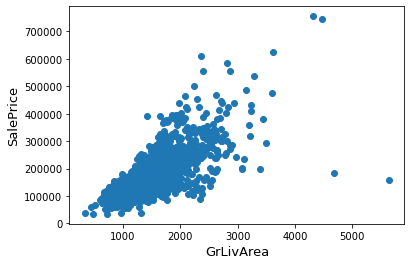

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [92]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [93]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('GrLivArea', fontsize=13)
# plt.show()

In [94]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.scatter(x = train['LotArea'], y = train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('LotArea', fontsize=13)
# plt.show()

In [95]:
#Deleting outliers
# train = train.drop(train[(train['LotArea']>100000) & (train['SalePrice']<400000)].index)

In [96]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.scatter(x = train['LotArea'], y = train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('LotArea', fontsize=13)
# plt.show()

In [97]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['MiscVal'], y = train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('MiscVal', fontsize=13)
# plt.show()

In [98]:
# train = train.drop(train[(train['MiscVal']>8000) & (train['SalePrice']<300000)].index)

In [99]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['MiscVal'], y = train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('MiscVal', fontsize=13)
# plt.show()

In [100]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# TargetVariable


 mu = 180932.92 and sigma = 79467.79



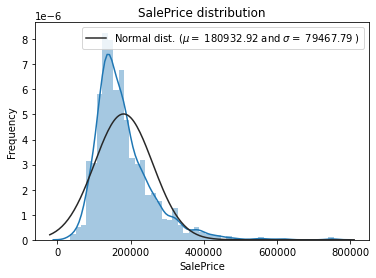

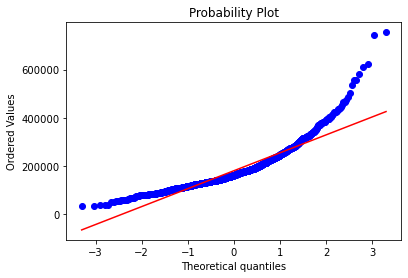

In [101]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
import seaborn as sns
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



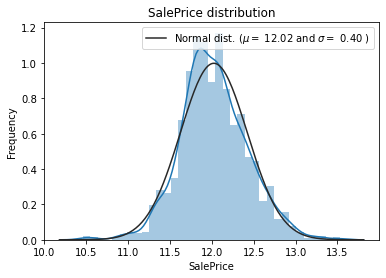

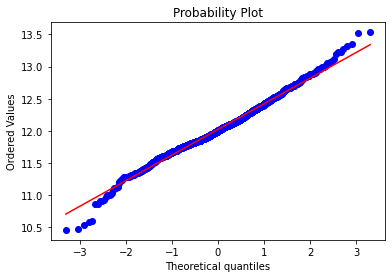

In [102]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [103]:
#MSSubClass=The building class
#train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
#train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
#train['YrSold'] = train['YrSold'].astype(str)
#train['MoSold'] = train['MoSold'].astype(str)


#MSSubClass=The building class
#test['MSSubClass'] = test['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
#test['OverallCond'] = test['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
#test['YrSold'] = test['YrSold'].astype(str)
#test['MoSold'] = test['MoSold'].astype(str)

In [104]:
eps=0.125
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
# Adding total above ground 
train['TotalAboveGroundSF'] = train['1stFlrSF'] + train['2ndFlrSF']
# All bathrooms
train['AllBath'] = train['FullBath'] + train['HalfBath']
#train['BsmtAllBath'] = train['BsmtFullBath'] + train['BsmtHalfBath']
#train['FullAllBath'] = train['AllBath'] + train['BsmtAllBath']
# Average Bedroom
train['AverageBedroomSF'] = train['TotalAboveGroundSF'] / (train['BedroomAbvGr'] + eps)
# Bedroom / Bathroom ratio
#train['BedroomBathroomRatio'] = train['BedroomAbvGr'] / (train['AllBath'] + eps)

test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
# Adding total above ground 
test['TotalAboveGroundSF'] = test['1stFlrSF'] + test['2ndFlrSF']
# All bathrooms
test['AllBath'] = test['FullBath'] + test['HalfBath']
#test['BsmtAllBath'] = test['BsmtFullBath'] + test['BsmtHalfBath']
#test['FullAllBath'] = test['AllBath'] + test['BsmtAllBath']
# Average Bedroom
test['AverageBedroomSF'] = test['TotalAboveGroundSF'] / (test['BedroomAbvGr'] + eps)
# Bedroom / Bathroom ratio
#test['BedroomBathroomRatio'] = test['BedroomAbvGr'] / (test['AllBath'] + eps)

In [105]:
train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     16
2       3
1       2
Name: OverallQual, dtype: int64

In [106]:
new_train=train.copy(deep=True)
new_test=test.copy(deep=True)



In [107]:
new_train.MSSubClass.value_counts()

20     536
60     297
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [108]:
train.iloc[:30][['LotArea','SalePrice']]

,LotArea,SalePrice
0,8450,12.247699
1,9600,12.109016
2,11250,12.317171
3,9550,11.849405
4,14260,12.429220
5,14115,11.870607
6,10084,12.634606
7,10382,12.206078
8,6120,11.774528
9,7420,11.678448


In [109]:
train['GardenSF']=train['LotArea']-train['1stFlrSF']
test['GardenSF']=test['LotArea']-test['1stFlrSF']

In [110]:
train.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    48
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [111]:
train.iloc[:30][['YearBuilt','SalePrice']]

,YearBuilt,SalePrice
0,2003,12.247699
1,1976,12.109016
2,2001,12.317171
3,1915,11.849405
4,2000,12.429220
5,1993,11.870607
6,2004,12.634606
7,1973,12.206078
8,1931,11.774528
9,1939,11.678448


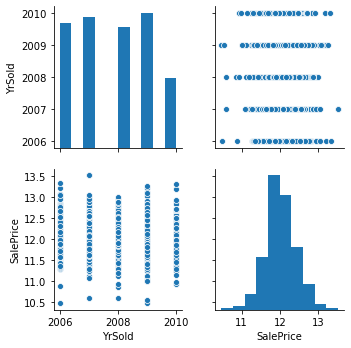

In [112]:
import seaborn as sns
sns.pairplot(train[['YrSold','SalePrice']])
#sns.pairplot(train[[t for t in list(train) if t not in ['id']]])

In [113]:
features = [fast for fast in list(train) if fast not in ['SalePrice','Id','BsmtAllBath']]
objects = [fast for fast in features if train[fast].dtypes == object]

In [114]:
objects 

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [115]:
features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

In [116]:
from sklearn.model_selection import KFold
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values
def mean_target_encoding(train, test, target, categorical, alpha=7):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

# Target encoder

In [117]:
new_train=train.copy(deep=True)
new_test=test.copy(deep=True)
for x in objects:
    new_train[x], new_test[x] = mean_target_encoding(train=new_train , test=new_test,target='SalePrice',categorical=x)

In [118]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 84 columns):
Id                    1459 non-null int64
MSSubClass            1459 non-null int64
MSZoning              1459 non-null float64
LotFrontage           1459 non-null float64
LotArea               1459 non-null int64
Street                1459 non-null float64
LotShape              1459 non-null float64
LandContour           1459 non-null float64
Utilities             1459 non-null float64
LotConfig             1459 non-null float64
LandSlope             1459 non-null float64
Neighborhood          1459 non-null float64
Condition1            1459 non-null float64
Condition2            1459 non-null float64
BldgType              1459 non-null float64
HouseStyle            1459 non-null float64
OverallQual           1459 non-null int64
OverallCond           1459 non-null int64
YearBuilt             1459 non-null int64
YearRemodAdd          1459 non-null int64
RoofStyle             1459 

# CatboostRegressor

In [148]:
cat_params = {'iterations':1600,
        'learning_rate':0.006,
        'depth':5,
        'loss_function':'RMSE',
        'eval_metric':'RMSE',
        'random_seed':123,
        #'cat_features':met_categories,
        #'cat_features':['old_binned'],
        'metric_period':200,  
        'od_type':"Iter",  
        'od_wait':20, 
        #'use_best_model':True
        'verbose':True,
        #'task_type':"GPU",
        #'devices':'0:1'
        }

In [120]:
from sklearn.model_selection import train_test_split
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



X_train, X_test, y_train, y_test = train_test_split(new_train[features], 
                                                 new_train['SalePrice'], 
                                                 test_size=0.2, 
                                                random_state=123)

# Build and fit a CatBoost regressor

reg_cat = cb.CatBoostRegressor(**cat_params)
reg_cat.fit(X_train,y_train,eval_set=(X_test,y_test),use_best_model=True, plot= True)
from sklearn.metrics import mean_squared_log_error
cat_pred=np.expm1(reg_cat.predict(X_test[features]))
print(np.sqrt(mean_squared_log_error( np.expm1(y_test), cat_pred) ))
prediction = reg_cat.predict(new_test[features])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3982898	test: 0.3967516	best: 0.3967516 (0)	total: 59.8ms	remaining: 3m 5s
200:	learn: 0.2117759	test: 0.2130630	best: 0.2130630 (200)	total: 1.4s	remaining: 20.2s
400:	learn: 0.1476954	test: 0.1571759	best: 0.1571759 (400)	total: 2.68s	remaining: 18.1s
600:	learn: 0.1227100	test: 0.1385200	best: 0.1385200 (600)	total: 4.13s	remaining: 17.2s
800:	learn: 0.1104517	test: 0.1298262	best: 0.1298262 (800)	total: 5.12s	remaining: 14.7s
1000:	learn: 0.1028012	test: 0.1247626	best: 0.1247626 (1000)	total: 6.23s	remaining: 13.1s
1200:	learn: 0.0974724	test: 0.1221498	best: 0.1221452 (1198)	total: 7.24s	remaining: 11.4s
1400:	learn: 0.0930839	test: 0.1205453	best: 0.1205453 (1400)	total: 7.88s	remaining: 9.56s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.1197426919
bestIteration = 1522

Shrink model to first 1523 iterations.
0.11974267091254781


In [121]:
new_train.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1458, dtype: float64

# LinearRegression

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train,y_train) 
linear_pred = np.expm1(model.predict(X_test))
print(np.sqrt(mean_squared_log_error( np.expm1(y_test), linear_pred)))

0.11870481045058268


# RidgeRegressor

In [123]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

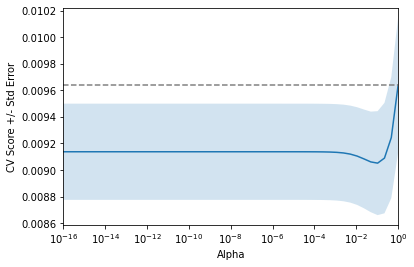

In [124]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-16, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = np.sqrt(-cross_val_score(ridge,X=X_train,y=y_train, cv=10,scoring='neg_mean_squared_log_error'))
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [125]:
alpha_space

array([1.00000000e-16, 2.12095089e-16, 4.49843267e-16, 9.54095476e-16,
       2.02358965e-15, 4.29193426e-15, 9.10298178e-15, 1.93069773e-14,
       4.09491506e-14, 8.68511374e-14, 1.84206997e-13, 3.90693994e-13,
       8.28642773e-13, 1.75751062e-12, 3.72759372e-12, 7.90604321e-12,
       1.67683294e-11, 3.55648031e-11, 7.54312006e-11, 1.59985872e-10,
       3.39322177e-10, 7.19685673e-10, 1.52641797e-09, 3.23745754e-09,
       6.86648845e-09, 1.45634848e-08, 3.08884360e-08, 6.55128557e-08,
       1.38949549e-07, 2.94705170e-07, 6.25055193e-07, 1.32571137e-06,
       2.81176870e-06, 5.96362332e-06, 1.26485522e-05, 2.68269580e-05,
       5.68986603e-05, 1.20679264e-04, 2.55954792e-04, 5.42867544e-04,
       1.15139540e-03, 2.44205309e-03, 5.17947468e-03, 1.09854114e-02,
       2.32995181e-02, 4.94171336e-02, 1.04811313e-01, 2.22299648e-01,
       4.71486636e-01, 1.00000000e+00])

In [126]:
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-16, 0, 50)

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True,alpha=1.04811313e-01)

ridge.fit(X_train,y_train) 
ridge_pred = np.expm1(ridge.predict(X_test))
print(np.sqrt(mean_squared_log_error( np.expm1(y_test), ridge_pred)))

0.1191502672717558


# XGBoostRegressor

In [127]:
xgb_params = {"objective":"reg:squarederror",
          #"gamma":2,
          #"lambda":1,
          'learning_rate': 0.15,
          'max_depth': 3, 
          'loss_function':'rmse',
          'eval_metric':'rmse',
               'n_estimators':100,
               'colsample_bytree':0.8,
          #'n_estimators':100,
          #'alpha': 3,
          #'booster':'dart',
          #'booster':"gblinear",
          #'colsample_bytree':0.6,
          'verbose':3,
          #'use_best_model':True,
           'num_boost_round':50000,
           'early_stopping_rounds':90,
         }

In [128]:

import xgboost  as xgb

data_dmatrix = xgb.DMatrix(data=new_train[features],label=new_train["SalePrice"])


cv_results = xgb.cv(dtrain=data_dmatrix, params=xgb_params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=90,metrics="rmse", as_pandas=True, seed=123,verbose_eval=2)
print((cv_results["test-rmse-mean"]).tail(1))

[0]	train-rmse:9.80533+0.00116841	test-rmse:9.80533+0.00302799
[2]	train-rmse:7.09225+0.000818914	test-rmse:7.0927+0.00378384
[4]	train-rmse:5.13169+0.00068688	test-rmse:5.13186+0.00367526
[6]	train-rmse:3.71483+0.000494728	test-rmse:3.71425+0.00372716
[8]	train-rmse:2.69124+0.000437482	test-rmse:2.69062+0.00407715
[10]	train-rmse:1.95169+0.000201677	test-rmse:1.95171+0.00382181
[12]	train-rmse:1.41723+0.000252337	test-rmse:1.41789+0.00434082
[14]	train-rmse:1.0313+0.000201399	test-rmse:1.03264+0.00296514
[16]	train-rmse:0.753001+0.000173576	test-rmse:0.756092+0.00251442
[18]	train-rmse:0.552764+0.000286127	test-rmse:0.558093+0.00156177
[20]	train-rmse:0.409291+0.000401684	test-rmse:0.41793+0.000377866
[22]	train-rmse:0.307443+0.000466275	test-rmse:0.320088+0.00171623
[24]	train-rmse:0.23607+0.000688578	test-rmse:0.252948+0.00269165
[26]	train-rmse:0.186936+0.000870212	test-rmse:0.208382+0.00349542
[28]	train-rmse:0.153554+0.00120896	test-rmse:0.178999+0.00493306
[30]	train-rmse:0.1317

In [129]:
model_xgb=xgb.XGBRegressor(**xgb_params)
model_xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=90)

xgb_pred = np.expm1(model_xgb.predict(X_test))
print(np.sqrt(mean_squared_log_error( np.expm1(y_test), xgb_pred)))

[0]	validation_0-rmse:9.79418
Will train until validation_0-rmse hasn't improved in 90 rounds.
[1]	validation_0-rmse:8.327
[2]	validation_0-rmse:7.08321
[3]	validation_0-rmse:6.02403
[4]	validation_0-rmse:5.12323
[5]	validation_0-rmse:4.35735
[6]	validation_0-rmse:3.70701
[7]	validation_0-rmse:3.15624
[8]	validation_0-rmse:2.68486
[9]	validation_0-rmse:2.28576
[10]	validation_0-rmse:1.94675
[11]	validation_0-rmse:1.65835
[12]	validation_0-rmse:1.41497
[13]	validation_0-rmse:1.20769
[14]	validation_0-rmse:1.02981
[15]	validation_0-rmse:0.880154
[16]	validation_0-rmse:0.754054
[17]	validation_0-rmse:0.647265
[18]	validation_0-rmse:0.556518
[19]	validation_0-rmse:0.480627
[20]	validation_0-rmse:0.41715
[21]	validation_0-rmse:0.363619
[22]	validation_0-rmse:0.319681
[23]	validation_0-rmse:0.282528
[24]	validation_0-rmse:0.251273
[25]	validation_0-rmse:0.22527
[26]	validation_0-rmse:0.205278
[27]	validation_0-rmse:0.189163
[28]	validation_0-rmse:0.176426
[29]	validation_0-rmse:0.165622
[30]

# RandomForestRegressor

In [130]:
from sklearn.ensemble import RandomForestRegressor
model_tree=RandomForestRegressor(n_estimators=280,max_features=26)
model_tree.fit(X_train,y_train)
Random_pred=np.expm1(model_tree.predict(X_test))
print(np.sqrt(mean_squared_log_error( np.expm1(y_test),Random_pred )))

0.12783102830819423


# LightGBM

In [131]:
light_params = {
          #"gamma":2,
          #"lambda":1,
          'learning_rate': 0.15,
          'max_depth': 3, 
          'loss_function':'rmse',
          'eval_metric':'rmse',
          #'n_estimators':100,
          #'alpha': 3,
          #'booster':'dart',
          #'booster':"gblinear",
          'colsample_bytree':0.7,
          'verbose':3,
          #'use_best_model':True,
           'num_boost_round':50000,
           'early_stopping_rounds':90,
         }
import lightgbm as lgb
light_model = lgb.LGBMRegressor(max_depth=3,learning_rate=0.1,n_estimators=300, seed=500)
light_model.fit(X_train,y_train)
light_pred=np.expm1(light_model.predict(X_test))
print(np.sqrt(mean_squared_log_error( np.expm1(y_test), light_pred)))

0.11800153861072678


# Averging

In [132]:
print('RMSLE: {:0.4f}'.format(np.sqrt(mean_squared_log_error( np.expm1(y_test), 0.3*xgb_pred+0.3*cat_pred+0.1*light_pred+0.3*ridge_pred))))

RMSLE: 0.1135


# Stacking Regressor

In [147]:
cat_params_stack = {'iterations':1530,
        'learning_rate':0.006,
        #'depth':5,
        'loss_function':'RMSE',
        'eval_metric':'RMSE',
        'random_seed':123,
        #'cat_features':met_categories,
        #'cat_features':['old_binned'],
        'metric_period':200,  
        'od_type':"Iter",  
        'od_wait':20, 
        #'use_best_model':True
        'verbose':True,
        }

In [134]:
xgb_params_stack = {"objective":"reg:squarederror",
          #"gamma":2,
          #"lambda":1,
          #'learning_rate': 0.15,
          #'max_depth': 3, 
          'loss_function':'rmse',
          'eval_metric':'rmse',
               'n_estimators':100,
               'colsample_bytree':0.8,
          #'n_estimators':100,
          #'alpha': 3,
          #'booster':'dart',
          #'booster':"gblinear",
          #'colsample_bytree':0.6,
          'verbose':3,
          #'use_best_model':True,
           'num_boost_round':50000,
           'early_stopping_rounds':90,
         }

In [135]:
#stregr.get_params().keys()xgbregressor__colsample_byt

In [149]:
from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingRegressor

#1st_layer estimator
clf1 =cb.CatBoostRegressor(**cat_params)
clf2=xgb.XGBRegressor(**xgb_params)
clf3=LinearRegression()
clf4 = lgb.LGBMRegressor(max_depth=3,learning_rate=0.1,n_estimators=150, seed=500)
clf5 =Ridge(normalize=True,alpha=1.04811313e-01)

#2nd_layer estimator

model_tree=RandomForestRegressor(n_estimators=280,max_features=25)
#stacking Regressor
clf_stack = StackingRegressor(regressors=[clf1,clf2,clf4,clf5,clf3],
                              meta_regressor = model_tree,
                              use_features_in_secondary=True,
                              store_train_meta_features=True,verbose=3)

#ridge_cv_scores = np.sqrt(-cross_val_score(clf_stack,X=new_train[features],y=np.expm1(new_train['SalePrice']), cv=10,scoring='neg_mean_squared_log_error'))


clf_stack.fit(new_train[features],new_train['SalePrice'])
pred_stack=clf_stack.predict(X_test)
print('RMSLE: {:0.4f}'.format(np.sqrt(mean_squared_log_error( np.expm1(y_test), np.expm1(pred_stack)))))

Fitting 5 regressors...
Fitting regressor1: catboostregressor (1/5)
0:	learn: 0.3980311	total: 3.47ms	remaining: 5.55s
200:	learn: 0.2098536	total: 656ms	remaining: 4.56s
400:	learn: 0.1470294	total: 1.31s	remaining: 3.92s
600:	learn: 0.1229850	total: 2.13s	remaining: 3.54s
800:	learn: 0.1112922	total: 2.73s	remaining: 2.73s
1000:	learn: 0.1041225	total: 3.37s	remaining: 2.02s
1200:	learn: 0.0989612	total: 3.98s	remaining: 1.32s
1400:	learn: 0.0947198	total: 4.62s	remaining: 656ms
1599:	learn: 0.0910022	total: 5.26s	remaining: 0us
Fitting regressor2: xgbregressor (2/5)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, early_stopping_rounds=90,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.15, loss_function='rmse', max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_boost_round=50000

In [137]:
pred_cat_test=np.expm1(reg_cat.predict(new_test[features]))
pred_xgb_test=np.expm1(model_xgb.predict(new_test[features]))
pred_linear_test=np.expm1(model.predict(new_test[features]))
pred_light_test=np.expm1(light_model.predict(new_test[features]))
pred_averging=0.3*pred_xgb_test+0.3*pred_cat_test+0.2*pred_light_test+0.2*pred_linear_test
prediction=np.expm1(clf_stack.predict(new_test[features]))
new_test['SalePrice']=prediction
pred=new_test[['Id','SalePrice']]
pred.to_csv('C:\\Users\Achraf\Desktop\meetup\MysubmissionMLP.csv',index=False)